# Data Cleaning, Manipulation

### At first we have to look at the data and decide if the data is good if they exists NaN values. Then we have to grow up the date with new values. The new values are financial indicators that will help to better understand the data and that will help for many machine learning methods to perform better.  At the end we will creat a new csv file as a workfile and save this file on the desktop. 

#### Imports

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Data upload Import
import yfinance as yf

In [2]:
# Download dataset from Yahoo Finance # from 30.07.2007 - NOW! 
bco = yf.download('BZ=F', start='2007-07-30',period='1d') # Only trading days

[*********************100%***********************]  1 of 1 completed


In [3]:
#print(bco.head())
#print(bco.tail())
print(type(bco))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# few Info of the dataset
bco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3655 entries, 2007-07-30 to 2022-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3655 non-null   float64
 1   High       3655 non-null   float64
 2   Low        3655 non-null   float64
 3   Close      3655 non-null   float64
 4   Adj Close  3655 non-null   float64
 5   Volume     3655 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 199.9 KB


# Financial Indicator

##### For a good classification model we have to calculate some financial indicators like returns, signal flag for the lable, Relative Strength Index (RSI), Stochastic Oscillator, Williams %R, Moving Average Convergence Divergnece (MACD), Price Rate Of Change, On Balance Volume. Maybe we also have to smoothe the data. At the end we will make a forecast with the model. But insted of values we will predict a sell or buy binary signal. 

## Returns
##### Returns are the differenz between the value today and the value from yesterday. So we can see if the price increase or decrease. In this cast we want see the behavior  of the Close value. 

In [5]:
bco['Returns']= bco['Close'].pct_change()
bco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3655 entries, 2007-07-30 to 2022-04-27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3655 non-null   float64
 1   High       3655 non-null   float64
 2   Low        3655 non-null   float64
 3   Close      3655 non-null   float64
 4   Adj Close  3655 non-null   float64
 5   Volume     3655 non-null   int64  
 6   Returns    3654 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 228.4 KB


In [6]:
print(bco.head()) # Idee: Prozentuale Steigung gegenüber Letztem tag. ((Close_t*100)/Close_t-1) - 100

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2007-07-30  75.849998  76.529999  75.440002  75.739998  75.739998    2575   
2007-07-31  75.699997  77.169998  75.669998  77.050003  77.050003    3513   
2007-08-01  77.000000  77.059998  74.860001  75.349998  75.349998    3930   
2007-08-02  75.220001  76.209999  74.269997  75.760002  75.760002    6180   
2007-08-03  75.389999  76.000000  74.529999  74.750000  74.750000    4387   

             Returns  
Date                  
2007-07-30       NaN  
2007-07-31  0.017296  
2007-08-01 -0.022064  
2007-08-02  0.005441  
2007-08-03 -0.013332  


## Log Returns
##### Log Returns are the same as the Returns but in a Loghatitmic Scale

In [7]:
bco['Log_Returns'] = np.log(1 + bco['Close'].pct_change())

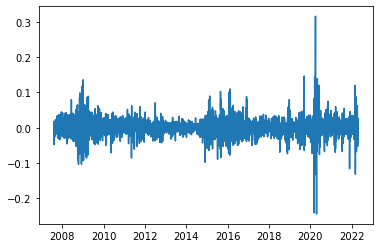

In [8]:
plt.plot(bco['Returns'])

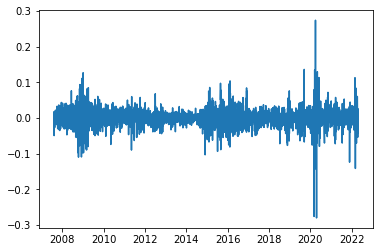

In [9]:
plt.plot(bco['Log_Returns'])

## Signal
##### For the trading signal we use the returns but for a Random Forest we have to creat a binary signal for a clean classification. We look at the return values and indicate all values smaller then 0 with 0 and all values bigger then 0 with 1.

In [10]:
bco['Signal'] = (bco['Returns'] > 0).astype(int)

In [11]:
bco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3655 entries, 2007-07-30 to 2022-04-27
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3655 non-null   float64
 1   High         3655 non-null   float64
 2   Low          3655 non-null   float64
 3   Close        3655 non-null   float64
 4   Adj Close    3655 non-null   float64
 5   Volume       3655 non-null   int64  
 6   Returns      3654 non-null   float64
 7   Log_Returns  3654 non-null   float64
 8   Signal       3655 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 285.5 KB


In [12]:
bco 

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Signal
Date,,,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575,NaN,NaN,0
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513,0.017296,0.017148,1
2007-08-01,77.000000,77.059998,74.860001,75.349998,75.349998,3930,-0.022064,-0.022311,0
2007-08-02,75.220001,76.209999,74.269997,75.760002,75.760002,6180,0.005441,0.005427,1
2007-08-03,75.389999,76.000000,74.529999,74.750000,74.750000,4387,-0.013332,-0.013421,0
...,...,...,...,...,...,...,...,...,...
2022-04-21,107.010002,109.790001,106.779999,108.330002,108.330002,13203,0.014326,0.014224,1
2022-04-22,108.639999,108.730003,105.529999,106.650002,106.650002,11040,-0.015508,-0.015630,0
2022-04-25,105.739998,105.949997,99.470001,102.320000,102.320000,15464,-0.040600,-0.041447,0


## Predict Signal
#### The predict signal is the same as the signal before. However, it has been shifted back by one.

In [13]:
bco['Pred_Signal'] = bco['Signal'].shift(-1)
bco.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Signal,Pred_Signal
Date,,,,,,,,,,
2022-04-21,107.010002,109.790001,106.779999,108.330002,108.330002,13203,0.014326,0.014224,1,0.0
2022-04-22,108.639999,108.730003,105.529999,106.650002,106.650002,11040,-0.015508,-0.015630,0,0.0
2022-04-25,105.739998,105.949997,99.470001,102.320000,102.320000,15464,-0.040600,-0.041447,0,1.0
2022-04-26,102.570000,106.150002,101.120003,104.989998,104.989998,15464,0.026095,0.025760,1,1.0
2022-04-27,105.370003,106.349998,104.820000,105.180000,105.180000,1639,0.001810,0.001808,1,NaN


## Open - Close
##### We build the difference between Open and Close Price

##### Open-Close = Open_t - Close_t

In [14]:
bco['Open-Close'] = bco['Open'] - bco['Close']
bco.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Signal,Pred_Signal,Open-Close
Date,,,,,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575,NaN,NaN,0,1.0,0.110001
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513,0.017296,0.017148,1,0.0,-1.350006
2007-08-01,77.000000,77.059998,74.860001,75.349998,75.349998,3930,-0.022064,-0.022311,0,1.0,1.650002
2007-08-02,75.220001,76.209999,74.269997,75.760002,75.760002,6180,0.005441,0.005427,1,0.0,-0.540001
2007-08-03,75.389999,76.000000,74.529999,74.750000,74.750000,4387,-0.013332,-0.013421,0,0.0,0.639999


## High - Low
##### We build the difference between the High and Low Price

##### High-Low = High_t - Low_t

In [15]:
bco['High-Low'] = bco['High'] - bco['Low']

## Relative Strength Index (RSI)
##### **Definition From Paper:**
##### RSI is a popular momentum indicator that determines whether the stock is overbought or oversold. A stock is said to be overbought when the demand unjustifiably pushes the price upwards. This condition is generally interpreted as a sign that the stock is overvalued, and the price is likely to go down. A stock is said to be oversold when the price goes down sharply to a level below its true value. This is a result caused due to panic selling. RSI ranges from 0 to 100, and generally, when RSI is above 70, it may indicate that the stock is overbought and when RSI is below 30, it may indicate the stock is oversold.
##### **Formula**
##### RSI = 100 - 100/(1+RS)

In [16]:
# Calculate the 14 day RSI
n = 14

# First make a copy of the data frame twice
up_df, down_df = bco[['Returns']].copy(), bco[['Returns']].copy() # For up days, if the change is less than 0 set to 0.
up_df.loc['Returns'] = up_df.loc[(up_df['Returns'] < 0), 'Returns'] = 0 # For down days, if the change is greater than 0 set to 0.
down_df.loc['Returns'] = down_df.loc[(down_df['Returns'] > 0), 'Returns'] = 0 # We need change in price to be absolute.
down_df['Returns'] = down_df['Returns'].abs()

# Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are 
# given less weight compared to newer values.
ewma_up = up_df['Returns'].transform(lambda x: x.ewm(span = n).mean()) 
ewma_down = down_df['Returns'].transform(lambda x: x.ewm(span = n).mean())

# Calculate the Relative Strength
relative_strength = ewma_up / ewma_down # Calculate the Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

# Add the info to the data frame.
bco['down_days'] = down_df['Returns'] 
bco['up_days'] = up_df['Returns'] 
bco['RSI'] = relative_strength_index

# Display the head.
bco.head(10)

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Signal,Pred_Signal,Open-Close,High-Low,down_days,up_days,RSI
Date,,,,,,,,,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575,NaN,NaN,0,1.0,0.110001,1.089996,NaN,NaN,NaN
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513,0.017296,0.017148,1,0.0,-1.350006,1.500000,0.000000,0.017296,100.000000
2007-08-01,77.000000,77.059998,74.860001,75.349998,75.349998,3930,-0.022064,-0.022311,0,1.0,1.650002,2.199997,0.022064,0.000000,40.454750
2007-08-02,75.220001,76.209999,74.269997,75.760002,75.760002,6180,0.005441,0.005427,1,0.0,-0.540001,1.940002,0.000000,0.005441,49.082357
2007-08-03,75.389999,76.000000,74.529999,74.750000,74.750000,4387,-0.013332,-0.013421,0,0.0,0.639999,1.470001,0.013332,0.000000,34.819850
2007-08-06,74.540001,74.599998,70.870003,71.169998,71.169998,7201,-0.047893,-0.049078,0,1.0,3.370003,3.729996,0.047893,0.000000,15.794871
2007-08-07,70.800003,72.010002,70.559998,71.800003,71.800003,6775,0.008852,0.008813,1,0.0,-1.000000,1.450005,0.000000,0.008852,24.582872
2007-08-08,71.440002,72.029999,70.660004,70.989998,70.989998,5768,-0.011281,-0.011346,0,0.0,0.450005,1.369995,0.011281,0.000000,21.312153
2007-08-09,70.910004,71.080002,69.269997,70.209999,70.209999,6232,-0.010987,-0.011048,0,1.0,0.700005,1.810005,0.010987,0.000000,18.540087


## One Week Rolling Mean RSI

In [17]:
bco['RSI_MA5'] = bco['RSI'].rolling(5).mean()

## Stochastic Oscillator
##### **Definition From Paper:**
##### Stochastic Oscillator follows the speed or the momentum of the price. As a rule, momentum changes before the price changes. It measures the level of the closing price relative to the low-high range over a period of time.
##### **Formula:**
##### C = Current Closing Price
##### L14 = Lowest low over the past 14 days
##### H14 = Highest high over the past 14 days
##### K = 100 * (C-L14)/(H14-L14)

In [18]:
# Calculate the Stochastic Oscillator
n = 14

# Make a copy of the high and low column.
low_14, high_14 = bco[['Low']].copy(), bco[['High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['Low'].transform(lambda x: x.rolling(window = n).min()) 
high_14 = high_14['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((bco['Close'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
bco['Low_14'] = low_14 
bco['High_14'] = high_14 
bco['K_percent'] = k_percent

# Display the head.
bco.head(15)

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Signal,Pred_Signal,Open-Close,High-Low,down_days,up_days,RSI,RSI_MA5,Low_14,High_14,K_percent
Date,,,,,,,,,,,,,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575,NaN,NaN,0,1.0,0.110001,1.089996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513,0.017296,0.017148,1,0.0,-1.350006,1.500000,0.000000,0.017296,100.000000,NaN,NaN,NaN,NaN
2007-08-01,77.000000,77.059998,74.860001,75.349998,75.349998,3930,-0.022064,-0.022311,0,1.0,1.650002,2.199997,0.022064,0.000000,40.454750,NaN,NaN,NaN,NaN
2007-08-02,75.220001,76.209999,74.269997,75.760002,75.760002,6180,0.005441,0.005427,1,0.0,-0.540001,1.940002,0.000000,0.005441,49.082357,NaN,NaN,NaN,NaN
2007-08-03,75.389999,76.000000,74.529999,74.750000,74.750000,4387,-0.013332,-0.013421,0,0.0,0.639999,1.470001,0.013332,0.000000,34.819850,NaN,NaN,NaN,NaN
2007-08-06,74.540001,74.599998,70.870003,71.169998,71.169998,7201,-0.047893,-0.049078,0,1.0,3.370003,3.729996,0.047893,0.000000,15.794871,48.030365,NaN,NaN,NaN
2007-08-07,70.800003,72.010002,70.559998,71.800003,71.800003,6775,0.008852,0.008813,1,0.0,-1.000000,1.450005,0.000000,0.008852,24.582872,32.946940,NaN,NaN,NaN
2007-08-08,71.440002,72.029999,70.660004,70.989998,70.989998,5768,-0.011281,-0.011346,0,0.0,0.450005,1.369995,0.011281,0.000000,21.312153,29.118420,NaN,NaN,NaN
2007-08-09,70.910004,71.080002,69.269997,70.209999,70.209999,6232,-0.010987,-0.011048,0,1.0,0.700005,1.810005,0.010987,0.000000,18.540087,23.009966,NaN,NaN,NaN


## Moving Average Convergence Divergnece (MACD)
##### **Definition From Paper:**
##### EMA stands for Exponential Moving Average. When the MACD goes below the SingalLine, it indicates a sell signal. When it goes above the Signal Line, it indicates a buy signal.
##### **Formula:**
##### MACD = Moving Average Convergence Divergence
##### C = Closing Price
##### EMAn = n day Exponential Moving Average
##### MACD = EMA12(C) - EMA26(C)
##### SignalLine = EMA9(MACD)

In [19]:
# Calculate the MACD
ema_26 = bco['Close'].transform(lambda x: x.ewm(span = 26).mean()) 
ema_12 = bco['Close'].transform(lambda x: x.ewm(span = 12).mean()) 
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
bco['MACD'] = macd 
bco['MACD_EMA'] = ema_9_macd

# Print the head.
bco.head(30)

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Signal,Pred_Signal,...,High-Low,down_days,up_days,RSI,RSI_MA5,Low_14,High_14,K_percent,MACD,MACD_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575,NaN,NaN,0,1.0,...,1.089996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513,0.017296,0.017148,1,0.0,...,1.500000,0.000000,0.017296,100.000000,NaN,NaN,NaN,NaN,0.029391,0.016328
2007-08-01,77.000000,77.059998,74.860001,75.349998,75.349998,3930,-0.022064,-0.022311,0,1.0,...,2.199997,0.022064,0.000000,40.454750,NaN,NaN,NaN,NaN,-0.015267,0.003380
2007-08-02,75.220001,76.209999,74.269997,75.760002,75.760002,6180,0.005441,0.005427,1,0.0,...,1.940002,0.000000,0.005441,49.082357,NaN,NaN,NaN,NaN,-0.020401,-0.004676
2007-08-03,75.389999,76.000000,74.529999,74.750000,74.750000,4387,-0.013332,-0.013421,0,0.0,...,1.470001,0.013332,0.000000,34.819850,NaN,NaN,NaN,NaN,-0.062952,-0.022012
2007-08-06,74.540001,74.599998,70.870003,71.169998,71.169998,7201,-0.047893,-0.049078,0,1.0,...,3.729996,0.047893,0.000000,15.794871,48.030365,NaN,NaN,NaN,-0.240430,-0.081215
2007-08-07,70.800003,72.010002,70.559998,71.800003,71.800003,6775,0.008852,0.008813,1,0.0,...,1.450005,0.000000,0.008852,24.582872,32.946940,NaN,NaN,NaN,-0.321567,-0.142042
2007-08-08,71.440002,72.029999,70.660004,70.989998,70.989998,5768,-0.011281,-0.011346,0,0.0,...,1.369995,0.011281,0.000000,21.312153,29.118420,NaN,NaN,NaN,-0.409325,-0.206275
2007-08-09,70.910004,71.080002,69.269997,70.209999,70.209999,6232,-0.010987,-0.011048,0,1.0,...,1.810005,0.010987,0.000000,18.540087,23.009966,NaN,NaN,NaN,-0.502567,-0.274720


## Price Rate Of Change
##### **Definition From Paper:**
##### It measures the most recent change in price with respect to the price in n days ago.
##### PROCt = Return at time t
##### Ct = Closing Price at time t
##### PROCt = Ct-Ct-n/Ct-n

In [20]:
# Calculate the Price Rate of Change
n=9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
bco['ROC'] = bco['Close'].transform(lambda x: x.pct_change(periods = n)) 

# Print the first 30 rows
bco.head(30)

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Signal,Pred_Signal,...,down_days,up_days,RSI,RSI_MA5,Low_14,High_14,K_percent,MACD,MACD_EMA,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575,NaN,NaN,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513,0.017296,0.017148,1,0.0,...,0.000000,0.017296,100.000000,NaN,NaN,NaN,NaN,0.029391,0.016328,NaN
2007-08-01,77.000000,77.059998,74.860001,75.349998,75.349998,3930,-0.022064,-0.022311,0,1.0,...,0.022064,0.000000,40.454750,NaN,NaN,NaN,NaN,-0.015267,0.003380,NaN
2007-08-02,75.220001,76.209999,74.269997,75.760002,75.760002,6180,0.005441,0.005427,1,0.0,...,0.000000,0.005441,49.082357,NaN,NaN,NaN,NaN,-0.020401,-0.004676,NaN
2007-08-03,75.389999,76.000000,74.529999,74.750000,74.750000,4387,-0.013332,-0.013421,0,0.0,...,0.013332,0.000000,34.819850,NaN,NaN,NaN,NaN,-0.062952,-0.022012,NaN
2007-08-06,74.540001,74.599998,70.870003,71.169998,71.169998,7201,-0.047893,-0.049078,0,1.0,...,0.047893,0.000000,15.794871,48.030365,NaN,NaN,NaN,-0.240430,-0.081215,NaN
2007-08-07,70.800003,72.010002,70.559998,71.800003,71.800003,6775,0.008852,0.008813,1,0.0,...,0.000000,0.008852,24.582872,32.946940,NaN,NaN,NaN,-0.321567,-0.142042,NaN
2007-08-08,71.440002,72.029999,70.660004,70.989998,70.989998,5768,-0.011281,-0.011346,0,0.0,...,0.011281,0.000000,21.312153,29.118420,NaN,NaN,NaN,-0.409325,-0.206275,NaN
2007-08-09,70.910004,71.080002,69.269997,70.209999,70.209999,6232,-0.010987,-0.011048,0,1.0,...,0.010987,0.000000,18.540087,23.009966,NaN,NaN,NaN,-0.502567,-0.274720,NaN


## Removing NaN Values
##### Classification algorithms can't accept Nan values, so we will need to remove them before feeding the data in. The code below prints the number of rows before dropping the NaN values, use the dropna method to remove any rows NaN values and then displays the number of rows after dropping the NaN values.

In [21]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(bco.shape[0], bco.shape[1]))

# Any row that has a `NaN` value will be dropped.
bco = bco.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(bco.shape[0], bco.shape[1]))

Before NaN Drop we have 3655 rows and 22 columns
After NaN Drop we have 3641 rows and 22 columns


## Transform Predict Signal in Integer

In [22]:
bco['Pred_Signal'] = bco['Pred_Signal'].astype(int)

# Print the head.
bco.head(10)

<ipython-input-22-2c2f1b40ffec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bco['Pred_Signal'] = bco['Pred_Signal'].astype(int)


,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Signal,Pred_Signal,...,down_days,up_days,RSI,RSI_MA5,Low_14,High_14,K_percent,MACD,MACD_EMA,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-16,70.620003,70.620003,69.050003,69.769997,69.769997,4762,-0.026103,-0.026449,0,1,...,0.026103,0.000000,29.797228,27.964267,68.970001,77.169998,9.756045,-0.572856,-0.478551,-0.066622
2007-08-17,70.330002,71.070000,70.040001,70.440002,70.440002,3279,0.009603,0.009557,1,0,...,0.000000,0.009603,37.710864,31.247200,68.970001,77.169998,17.926851,-0.563372,-0.496134,-0.010257
2007-08-20,69.680000,70.320000,68.940002,69.849998,69.849998,3852,-0.008376,-0.008411,0,0,...,0.008376,0.000000,33.868557,33.904159,68.940002,77.059998,11.206854,-0.584877,-0.514396,-0.027159
2007-08-21,69.760002,70.510002,68.180000,68.690002,68.690002,5588,-0.016607,-0.016746,0,1,...,0.016607,0.000000,27.466358,34.273473,68.180000,76.209999,6.351211,-0.665806,-0.545376,-0.032399
2007-08-22,68.970001,69.360001,68.190002,68.699997,68.699997,4232,0.000146,0.000145,1,1,...,0.000000,0.000146,27.604705,31.289543,68.180000,76.000000,6.649574,-0.718980,-0.580734,-0.021507
2007-08-23,69.150002,69.970001,69.110001,69.860001,69.860001,4087,0.016885,0.016744,1,1,...,0.000000,0.016885,42.332637,33.796624,68.180000,74.599998,26.168237,-0.676687,-0.600205,-0.007529
2007-08-24,69.550003,70.809998,69.519997,70.620003,70.620003,2786,0.010879,0.010820,1,1,...,0.000000,0.010879,49.908422,36.236136,68.180000,72.199997,60.696629,-0.586384,-0.597408,0.005553
2007-08-27,70.440002,71.110001,69.489998,70.949997,70.949997,3128,0.004673,0.004662,1,0,...,0.000000,0.004673,52.970446,40.056513,68.180000,72.199997,68.905447,-0.487753,-0.575273,0.006240
2007-08-28,71.050003,71.050003,70.199997,70.550003,70.550003,3421,-0.005638,-0.005654,0,1,...,0.005638,0.000000,48.816323,44.326506,68.180000,72.199997,58.955341,-0.432410,-0.546488,-0.015215


In [23]:
bco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3641 entries, 2007-08-16 to 2022-04-26
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3641 non-null   float64
 1   High         3641 non-null   float64
 2   Low          3641 non-null   float64
 3   Close        3641 non-null   float64
 4   Adj Close    3641 non-null   float64
 5   Volume       3641 non-null   int64  
 6   Returns      3641 non-null   float64
 7   Log_Returns  3641 non-null   float64
 8   Signal       3641 non-null   int64  
 9   Pred_Signal  3641 non-null   int64  
 10  Open-Close   3641 non-null   float64
 11  High-Low     3641 non-null   float64
 12  down_days    3641 non-null   float64
 13  up_days      3641 non-null   float64
 14  RSI          3641 non-null   float64
 15  RSI_MA5      3641 non-null   float64
 16  Low_14       3641 non-null   float64
 17  High_14      3641 non-null   float64
 18  K_percent    3641 non-null   f

## Drop all columns we do not need!

In [24]:
bco = bco.drop(['Open','High','Low','Adj Close','Volume','Returns','Signal','Open-Close','High-Low',
                'down_days','up_days','RSI_MA5','Low_14','High_14','MACD_EMA'], axis = 1)

## Create a new csv file and save on Desk

In [25]:
# df.to_csv("<path to desktop and filename>")
# If you just use file name then it will save CSV file in working directory.
# Example path : C:/Users/<>/Desktop/<file name>.csv

In [26]:
bco.to_csv('/Users/romaindeleze/Desktop/Bachelor/Romain_WI_TZ/8.Semester/BA/Daten/Brent_Crude_Oil')